In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install pytesseract opencv-python pillow


In [2]:
!sudo apt-get update
!sudo apt-get install -y tesseract-ocr


Get:1 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1227 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk InRelease [1618 B]       
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]      
Get:5 https://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [28.6 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]        
Get:7 https://packages.cloud.google.com/apt cloud-sdk/main all Packages [1576 kB]
Get:8 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [3410 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [128 kB]      
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [4107 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [4289 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [4137 kB]
G

In [3]:
!pip install pytesseract


In [4]:
!tesseract --version


tesseract 4.1.1
 leptonica-1.79.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 2.0.3) : libpng 1.6.44 : libtiff 4.1.0 : zlib 1.3.1 : libwebp 0.6.1 : libopenjp2 2.5.2
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.7.4 zlib/1.2.13 liblzma/5.2.6 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.5.6


Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]        
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]      
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [128 kB]      
Get:5 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1227 B]
Get:6 https://packages.cloud.google.com/apt cloud-sdk InRelease [1618 B]
Get:7 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1276 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [4137 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [30.9 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [4107 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1568 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [4573 kB]
Get:13 http://archive.ubun

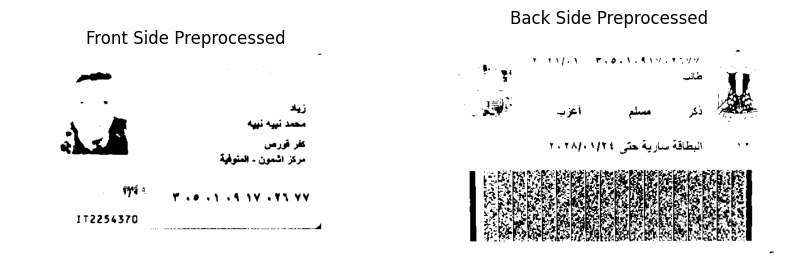


Extracted ID Number: Not Found

Structured Data:
 {'Front_Side_Text': 'ناجرم\nزياد عاد\nكفر قورص \u200ea\u200f\n\u200fمركز اشمون - المنوفية\nلال وا ووم لخ\n| 01100 172254370\n\x0c', 'Back_Side_Text': '° لاا ةا كلها" \u200ePOMP Y\u200f\n\n* \u200fلذ\u200e wile My\nae \u200fذكر مسلم أعزب\u200e a \u200fد\u200e\n\u200e7058/01/51 \u200fالبطاقة سارية حتى\u200e ad\n\nSEER oT Re a Se Le a ES\nENE ge Eat tis|s\n0 \u200fا ا ا\u200e\n\x0c', 'ID_Number': 'Not Found'}


In [1]:
# Step 1: Install Required Libraries
!sudo apt-get update
!sudo apt-get install -y tesseract-ocr tesseract-ocr-ara
!pip install pytesseract opencv-python

# Step 2: Import Libraries
import cv2
import pytesseract
import matplotlib.pyplot as plt
import re

# Configure Tesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Step 3: Load Front and Back Images
front_image_path = '/kaggle/input/id-dataset/front.png'  # Update this with the correct path
back_image_path = '/kaggle/input/id-dataset/back.png'    # Update this with the correct path

front_image = cv2.imread(front_image_path)
back_image = cv2.imread(back_image_path)

# Step 4: Preprocessing Function
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply thresholding
    _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
    return thresh

# Step 5: OCR Extraction Function
def extract_text(image, lang="ara+eng"):
    processed_image = preprocess_image(image)
    # Perform OCR
    text = pytesseract.image_to_string(processed_image, config='--oem 3 --psm 6', lang=lang)
    return text, processed_image

# Step 6: Extract Text from Front and Back
front_text, front_processed = extract_text(front_image)
back_text, back_processed = extract_text(back_image)

# Step 7: Display Results
print("Front Side Extracted Text:\n", front_text)
print("\nBack Side Extracted Text:\n", back_text)

# Step 8: Display Preprocessed Images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(front_processed, cmap='gray')
plt.title('Front Side Preprocessed')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(back_processed, cmap='gray')
plt.title('Back Side Preprocessed')
plt.axis('off')
plt.show()

# Step 9: Structured Extraction (Optional)
def extract_id_number(text):
    match = re.search(r'\b\d{14}\b', text)
    return match.group() if match else "Not Found"

id_number = extract_id_number(front_text)
print("\nExtracted ID Number:", id_number)

# Example: Save data in a structured format
id_data = {
    "Front_Side_Text": front_text,
    "Back_Side_Text": back_text,
    "ID_Number": id_number
}

# Display the final structured data
print("\nStructured Data:\n", id_data)
